In [29]:
import pandas as pd
import numpy as np
import scipy as sp

from sklearn.linear_model import TheilSenRegressor, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
FACTOR_PREDICTORS = ['type']
NUMERIC_PREDICTORS = ['bi_2', 'burst_behaviour', 'burst_index', 'burst_mean',
       'burst_percent', 'cv',
       'firing_rate', 'frequency_variance', 'isi_mean',
       'isi_median', 'isi_std', 'kurtoisis', 'lv', 'modalirity_burst',
       'nu', 'oscore_12.0_20.0', 'oscore_20.0_30.0', 'oscore_3.0_8.0',
       'oscore_30.0_60.0', 'oscore_60.0_90.0', 'oscore_8.0_12.0',
       'pause_index', 'pause_ratio', 'skewness']

In [31]:
def preprocess_data(data):
    data = data.drop(['data_name', 'doc_name', 'filter_length', 'spike_count', 'interval_name'], axis=1)
    
    for f in FACTOR_PREDICTORS:
        oh = pd.get_dummies(data[f])
        data = pd.concat([data, oh], axis=1).drop([f], axis=1)
        
#     for f in NUMERIC_PREDICTORS:
#         data[f] =  StandardScaler().fit_transform(data[f])     
    
    return data

In [32]:
awake = pd.read_csv('data/awake.csv')
sleep = pd.read_csv('data/sleep.csv')

awake['awake'] = 1
sleep['awake'] = 0

data = pd.concat([awake, sleep])

In [33]:
data = preprocess_data(data)

In [34]:
data.to_csv('preprocessed_data.csv', index=False)

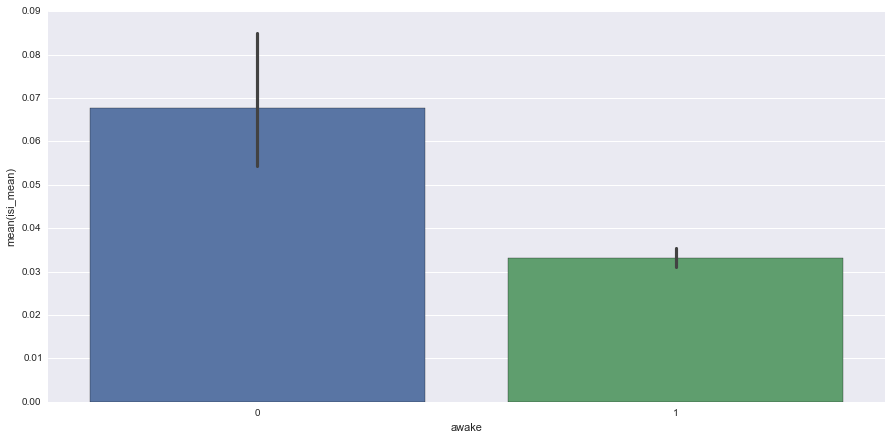

In [35]:
plt.figure(figsize=(15,7))
sns.barplot(x='awake', y='isi_mean', data=data)

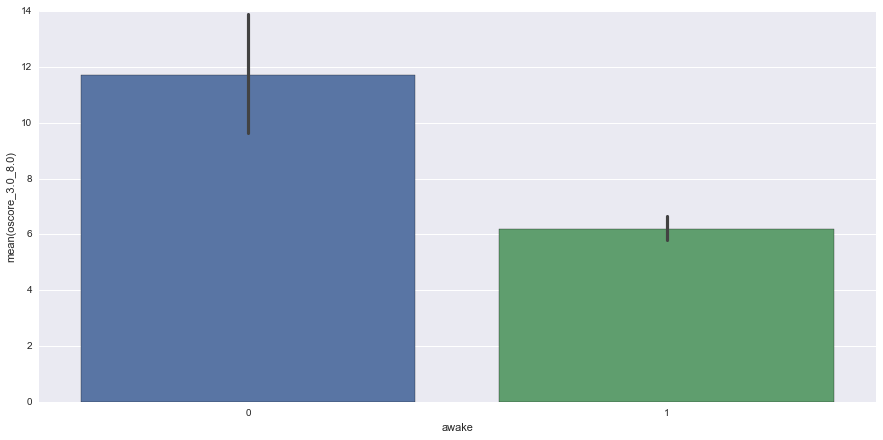

In [37]:
plt.figure(figsize=(15,7))
sns.barplot(x='awake', y='oscore_3.0_8.0', data=data)

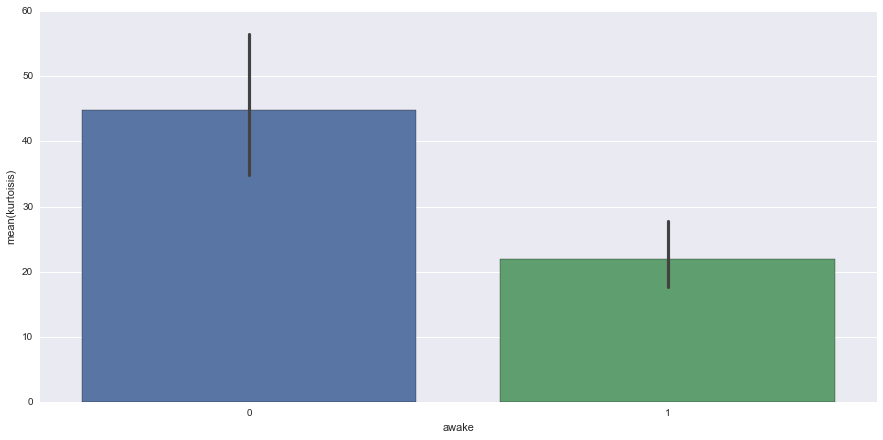

In [39]:
plt.figure(figsize=(15,7))
sns.barplot(x='awake', y='kurtoisis', data=data)

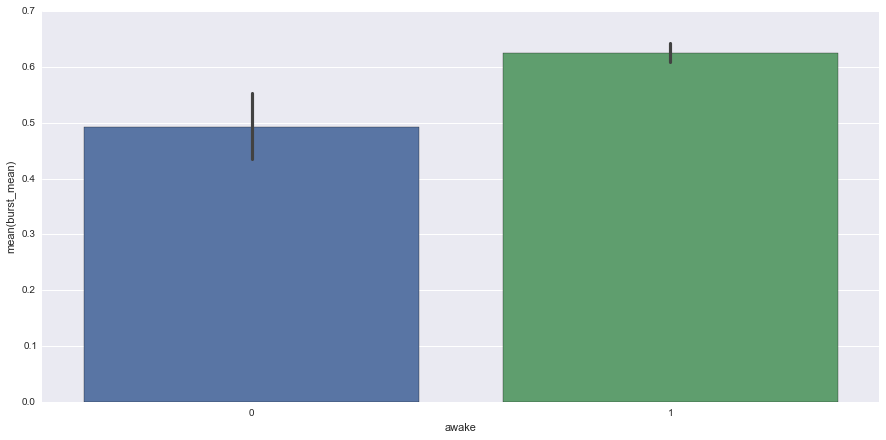

In [40]:
plt.figure(figsize=(15,7))
sns.barplot(x='awake', y='burst_mean', data=data)

In [41]:
X = data.drop(['awake'], axis=1)
y = data['awake']

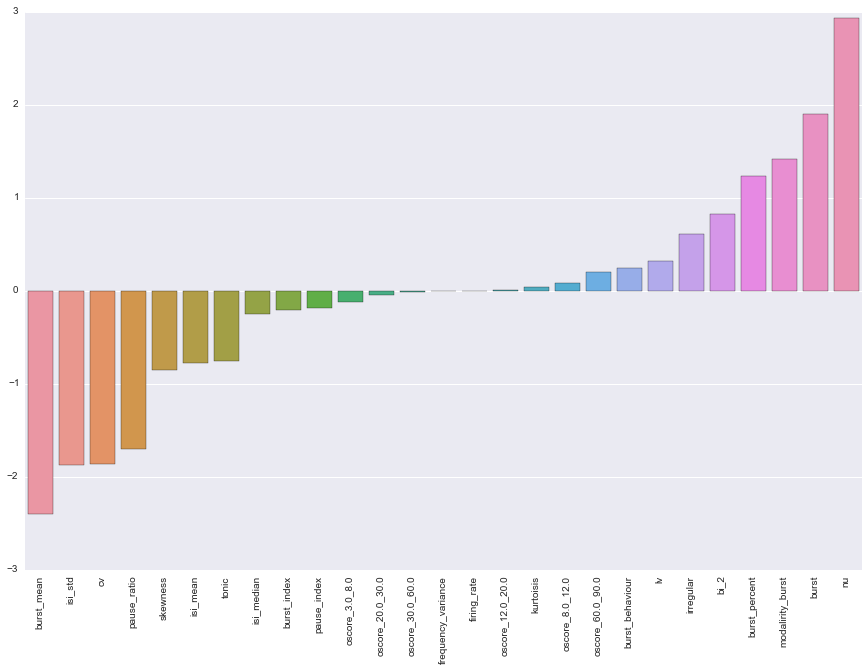

In [42]:
model = LogisticRegressionCV()
model.fit(X, y)

coef = sorted(zip(X.columns.values, model.coef_[0]), key=lambda x: x[1])

plt.figure(figsize=(15, 10))
sns.barplot([c[0] for c in coef], [c[1] for c in coef])

_ = plt.xticks(rotation=90)

In [47]:
model.scores_

{1: array([[ 0.78217822,  0.8019802 ,  0.82178218,  0.8019802 ,  0.77227723,
          0.76237624,  0.77227723,  0.79207921,  0.79207921,  0.8019802 ],
        [ 0.82      ,  0.87      ,  0.87      ,  0.88      ,  0.9       ,
          0.91      ,  0.91      ,  0.9       ,  0.9       ,  0.89      ],
        [ 0.7979798 ,  0.81818182,  0.7979798 ,  0.82828283,  0.85858586,
          0.88888889,  0.90909091,  0.88888889,  0.91919192,  0.8989899 ]])}